In [42]:
%run ./ml_model_init.ipynb

## Baseline Model


In [43]:
# Split the gk data into train and test sets
mid_splits = split_data(mid_player_data)

#### Linear Model


In [44]:

base_mid_lin_reg = Linear_regression(mid_splits['feature_train'], mid_splits['features_test'],
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = pd.DataFrame({"base_mid_lin_reg": [base_mid_lin_reg['train_MAE'], base_mid_lin_reg['test_MAE'], base_mid_lin_reg['train_RMSE'], base_mid_lin_reg['test_RMSE'], base_mid_lin_reg['cv_rmse'], base_mid_lin_reg['R2_train'], base_mid_lin_reg['R2_test']]},
                                                        index=(['train_MAE','test_MAE', 'train_RMSE', 'test_RMSE', 'cv_rmse', 'R2_train', 'R2_test']))

mid_evaluation_stats

Training set RMSE: 1.0047711767504086
Test set RMSE: 1.077485359912661
Training set R2: 0.8321104553174796
Test set R2: 0.8052993351543808


,base_mid_lin_reg
train_MAE,0.720422
test_MAE,0.767843
train_RMSE,1.004771
test_RMSE,1.077485
cv_rmse,1.009522
R2_train,0.832110
R2_test,0.805299


#### DecisionTree Model


In [45]:
base_mid_dt_reg = DecisionTreeRegression(mid_splits['feature_train'], mid_splits['features_test'],
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(base_mid_dt_reg = [base_mid_dt_reg['train_MAE'], base_mid_dt_reg['test_MAE'], base_mid_dt_reg['train_RMSE'], base_mid_dt_reg['test_RMSE'], base_mid_dt_reg['cv_rmse'], base_mid_dt_reg['R2_train'], base_mid_dt_reg['R2_test']])

mid_evaluation_stats



,base_mid_lin_reg,base_mid_dt_reg
train_MAE,0.720422,1.817137e-15
test_MAE,0.767843,6.848272e-01
train_RMSE,1.004771,3.147652e-15
test_RMSE,1.077485,1.614412e+00
cv_rmse,1.009522,1.517726e+00
R2_train,0.832110,1.000000e+00
R2_test,0.805299,5.629073e-01


#### RandomForest Model


In [46]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
base_mid_rf_reg = RandomForestRegression(mid_splits['feature_train'], mid_splits['features_test'],
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(base_mid_rf_reg = [base_mid_rf_reg['train_MAE'], base_mid_rf_reg['test_MAE'], base_mid_rf_reg['train_RMSE'], base_mid_rf_reg['test_RMSE'], base_mid_rf_reg['cv_rmse'], base_mid_rf_reg['R2_train'], base_mid_rf_reg['R2_test']])

mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg
train_MAE,0.720422,1.817137e-15,0.412641
test_MAE,0.767843,6.848272e-01,0.609155
train_RMSE,1.004771,3.147652e-15,0.775429
test_RMSE,1.077485,1.614412e+00,1.147357
cv_rmse,1.009522,1.517726e+00,1.063702
R2_train,0.832110,1.000000e+00,0.900006
R2_test,0.805299,5.629073e-01,0.779229


#### XgBoost Model


In [47]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
base_mid_xgb_reg = XGBoostRegression(mid_splits['feature_train'], mid_splits['features_test'], mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(base_mid_xgb_reg = [base_mid_xgb_reg['train_MAE'], base_mid_xgb_reg['test_MAE'], base_mid_xgb_reg['train_RMSE'], base_mid_xgb_reg['test_RMSE'], base_mid_xgb_reg['cv_rmse'], base_mid_xgb_reg['R2_train'], base_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650
test_MAE,0.767843,6.848272e-01,0.609155,0.745736
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108
R2_train,0.832110,1.000000e+00,0.900006,0.822156
R2_test,0.805299,5.629073e-01,0.779229,0.743413


# Feature engineering


### VarianceThreshold


In [48]:
VT_scaler = StandardScaler()
df_mid_train_scaled = pd.DataFrame(VT_scaler.fit_transform(mid_splits['feature_train']), columns=mid_splits['feature_train'].columns)
df_mid_test_scaled = pd.DataFrame(VT_scaler.transform(mid_splits['features_test']), columns=mid_splits['features_test'].columns)

selector = VarianceThreshold(threshold = 0.1)
selector.fit_transform(df_mid_train_scaled)

mid_threshold_columns = df_mid_train_scaled.columns[selector.get_support()]

mid_threshold_train = df_mid_train_scaled[mid_threshold_columns]
mid_threshold_test = df_mid_test_scaled[mid_threshold_columns]

mid_threshold_train.shape, mid_threshold_test.shape

((6828, 19), (1707, 19))

#### Model(VT)


##### Linear Model


In [49]:

VarT_mid_lin_reg = Linear_regression(mid_threshold_train, mid_threshold_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_lin_reg =  [VarT_mid_lin_reg['train_MAE'], VarT_mid_lin_reg['test_MAE'], VarT_mid_lin_reg['train_RMSE'], VarT_mid_lin_reg['test_RMSE'], VarT_mid_lin_reg['cv_rmse'], VarT_mid_lin_reg['R2_train'], VarT_mid_lin_reg['R2_test']])

mid_evaluation_stats

Training set RMSE: 1.0047711767504086
Test set RMSE: 1.0774853599126621
Training set R2: 0.8321104553174796
Test set R2: 0.8052993351543805


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299


##### DecisionTree Model


In [50]:
VarT_mid_dt_reg = DecisionTreeRegression(mid_threshold_train, mid_threshold_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_dt_reg = [VarT_mid_dt_reg['train_MAE'], VarT_mid_dt_reg['test_MAE'],  VarT_mid_dt_reg['train_RMSE'], VarT_mid_dt_reg['test_RMSE'], VarT_mid_dt_reg['cv_rmse'], VarT_mid_dt_reg['R2_train'], VarT_mid_dt_reg['R2_test']])

mid_evaluation_stats



,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01


##### RandomForest Model


In [51]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
VarT_mid_rf_reg = RandomForestRegression(mid_threshold_train, mid_threshold_test,
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_rf_reg = [VarT_mid_rf_reg['train_MAE'], VarT_mid_rf_reg['test_MAE'],  VarT_mid_rf_reg['train_RMSE'], VarT_mid_rf_reg['test_RMSE'], VarT_mid_rf_reg['cv_rmse'], VarT_mid_rf_reg['R2_train'], VarT_mid_rf_reg['R2_test']])

mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335


##### XgBoost Model


In [52]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
VarT_mid_xgb_reg = XGBoostRegression(mid_threshold_train, mid_threshold_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(VarT_mid_xgb_reg = [VarT_mid_xgb_reg['train_MAE'], VarT_mid_xgb_reg['test_MAE'],  VarT_mid_xgb_reg['train_RMSE'], VarT_mid_xgb_reg['test_RMSE'], VarT_mid_xgb_reg['cv_rmse'], VarT_mid_xgb_reg['R2_train'], VarT_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413


### Feature selection techniques


#### K-best features


In [53]:

from sklearn.feature_selection import SelectKBest, mutual_info_regression

k_rf_model = RandomForestRegressor(n_estimators=20,  max_depth=8, criterion='friedman_mse', max_features='sqrt', random_state=18)

score_list  = []

for k in range(1, mid_splits['features_test'].shape[1]):
  selector = SelectKBest(mutual_info_regression, k=k)
  k_sel_X_train =  selector.fit_transform(mid_threshold_train, mid_splits['target_train'])

  k_rf_model.fit(k_sel_X_train, mid_splits['target_train'])

  k_sel_cols = mid_threshold_train.columns[selector.get_support()]
  k_sel_X_test = mid_threshold_test[k_sel_cols]
  score = round(k_rf_model.score(k_sel_X_test.values, mid_splits['target_test'] ), 3)

  score_list.append(score)
print(score_list, score_list.index(max(score_list)))
num_of_feat = score_list.index(max(score_list)) # find the highest score. We will use  that as the value of k

[0.51, 0.536, 0.576, 0.587, 0.627, 0.626, 0.615, 0.628, 0.647, 0.651, 0.66, 0.683, 0.67, 0.659, 0.669, 0.695, 0.676, 0.687] 15


In [54]:
selector = SelectKBest(mutual_info_regression, k=num_of_feat)
selector.fit_transform(mid_threshold_train, mid_splits['target_train'])

sel_feats = selector.get_feature_names_out()
k_sel_X_train = mid_threshold_train[sel_feats]
k_sel_X_test = mid_threshold_test[sel_feats]

##### Model (KBest)


###### Linear Model


In [55]:

KBest_mid_lin_reg = Linear_regression(k_sel_X_train, k_sel_X_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_lin_reg =  [KBest_mid_lin_reg['train_MAE'], KBest_mid_lin_reg['test_MAE'],  KBest_mid_lin_reg['train_RMSE'], KBest_mid_lin_reg['test_RMSE'], KBest_mid_lin_reg['cv_rmse'], KBest_mid_lin_reg['R2_train'], KBest_mid_lin_reg['R2_test']])

mid_evaluation_stats

Training set RMSE: 1.035507419277129
Test set RMSE: 1.1082431479701125
Training set R2: 0.82168177000521
Test set R2: 0.7940248687916609


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025


###### DecisionTree Model


In [56]:
KBest_mid_dt_reg = DecisionTreeRegression(k_sel_X_train, k_sel_X_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_dt_reg = [KBest_mid_dt_reg['train_MAE'], KBest_mid_dt_reg['test_MAE'], KBest_mid_dt_reg['train_RMSE'], KBest_mid_dt_reg['test_RMSE'], KBest_mid_dt_reg['cv_rmse'], KBest_mid_dt_reg['R2_train'], KBest_mid_dt_reg['R2_test']])

mid_evaluation_stats



,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01


###### RandomForest Model


In [57]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
KBest_mid_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test,
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_rf_reg = [KBest_mid_rf_reg['train_MAE'], KBest_mid_rf_reg['test_MAE'], KBest_mid_rf_reg['train_RMSE'], KBest_mid_rf_reg['test_RMSE'], KBest_mid_rf_reg['cv_rmse'], KBest_mid_rf_reg['R2_train'], KBest_mid_rf_reg['R2_test']])

mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941


###### XgBoost Model


In [58]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
KBest_mid_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(KBest_mid_xgb_reg = [KBest_mid_xgb_reg['train_MAE'], KBest_mid_xgb_reg['test_MAE'], KBest_mid_xgb_reg['train_RMSE'], KBest_mid_xgb_reg['test_RMSE'], KBest_mid_xgb_reg['cv_rmse'], KBest_mid_xgb_reg['R2_train'], KBest_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430,0.673114
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984,0.784491
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756,1.052761
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243,1.254695
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832,1.161950
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495,0.815690
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941,0.735989


#### Mutual Information


In [59]:
from sklearn.feature_selection import mutual_info_regression
# def_sel_X_train
mutual_info = mutual_info_regression(k_sel_X_train, mid_splits['target_train'])
mutual_info

array([0.41775096, 0.00431929, 0.18740574, 0.12918407, 0.15942311,
       0.16119796, 0.23755813, 0.35048274, 0.42623135, 0.07271367,
       0.20683507, 0.04521256, 0.10927441, 0.18719492, 0.23897271])

In [60]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = k_sel_X_train.columns
mutual_info.sort_values(ascending=False)

ict_index                     0.426231
minutes                       0.417751
clean_sheets                  0.350483
xP                            0.238973
expected_goal_involvements    0.237558
threat                        0.206835
expected_goals                0.187406
xGChain                       0.187195
shots                         0.161198
npxG                          0.159423
expected_assists              0.129184
key_passes                    0.109274
xGBuildup                     0.072714
value                         0.045213
red_cards                     0.004319
dtype: float64

<Axes: >

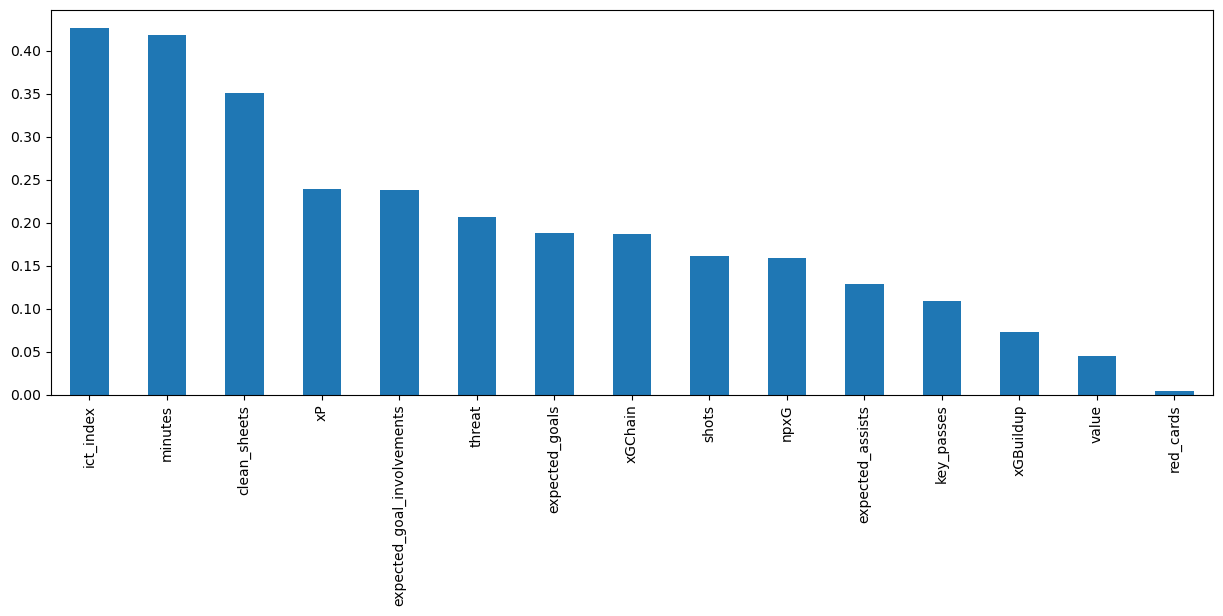

In [61]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

##### Select to 20% perct


In [62]:
from sklearn.feature_selection import SelectPercentile

## Selecting the top 20 percentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=50)
selected_top_columns.fit(k_sel_X_train, mid_splits['target_train'])

selected_top_columns.get_support()

array([ True, False, False, False, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True])

In [63]:
mid_20_columns = k_sel_X_train.columns[selected_top_columns.get_support()]

mid_20_train = k_sel_X_train[mid_20_columns]
mid_20_test = k_sel_X_test[mid_20_columns]


##### Model (MI)


###### Linear Model


In [64]:

MI_mid_lin_reg = Linear_regression(mid_20_train, mid_20_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_lin_reg =  [MI_mid_lin_reg['train_MAE'], MI_mid_lin_reg['test_MAE'], MI_mid_lin_reg['train_RMSE'], MI_mid_lin_reg['test_RMSE'], MI_mid_lin_reg['cv_rmse'], MI_mid_lin_reg['R2_train'], MI_mid_lin_reg['R2_test']])

mid_evaluation_stats

Training set RMSE: 1.4668302435026197
Test set RMSE: 1.5641772422125042
Training set R2: 0.6421928404060682
Test set R2: 0.5896857459872541


,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430,0.673114,1.019146
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984,0.784491,1.065862
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756,1.052761,1.466830
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243,1.254695,1.564177
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832,1.161950,1.469141
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495,0.815690,0.642193
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941,0.735989,0.589686


###### DecisionTree Model


In [65]:
MI_mid_dt_reg = DecisionTreeRegression(mid_20_train, mid_20_test,
                               mid_splits['target_train'], mid_splits['target_test'])

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_dt_reg = [MI_mid_dt_reg['train_MAE'], MI_mid_dt_reg['test_MAE'], MI_mid_dt_reg['train_RMSE'], MI_mid_dt_reg['test_RMSE'], MI_mid_dt_reg['cv_rmse'], MI_mid_dt_reg['R2_train'], MI_mid_dt_reg['R2_test']])

mid_evaluation_stats



,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430,0.673114,1.019146,8.872353e-16
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984,0.784491,1.065862,1.038664e+00
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756,1.052761,1.466830,2.250988e-15
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243,1.254695,1.564177,2.030956e+00
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832,1.161950,1.469141,1.869175e+00
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495,0.815690,0.642193,1.000000e+00
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941,0.735989,0.589686,3.082558e-01


###### RandomForest Model


In [66]:
hyperparameters = {"criterion": 'friedman_mse', "max_depth": 8, "max_features": 'sqrt', "n_estimators": 20}
MI_mid_rf_reg = RandomForestRegression(mid_20_train, mid_20_test,
                               mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_rf_reg = [MI_mid_rf_reg['train_MAE'], MI_mid_rf_reg['test_MAE'], MI_mid_rf_reg['train_RMSE'], MI_mid_rf_reg['test_RMSE'], MI_mid_rf_reg['cv_rmse'], MI_mid_rf_reg['R2_train'], MI_mid_rf_reg['R2_test']])

mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430,0.673114,1.019146,8.872353e-16,0.615772
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984,0.784491,1.065862,1.038664e+00,0.847049
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756,1.052761,1.466830,2.250988e-15,1.063251
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243,1.254695,1.564177,2.030956e+00,1.492659
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832,1.161950,1.469141,1.869175e+00,1.367879
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495,0.815690,0.642193,1.000000e+00,0.811999
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941,0.735989,0.589686,3.082558e-01,0.626349


###### XgBoost Model


In [67]:
hyperparameters = {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 150}
MI_mid_xgb_reg = XGBoostRegression(k_sel_X_train, k_sel_X_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(MI_mid_xgb_reg = [MI_mid_xgb_reg['train_MAE'], MI_mid_xgb_reg['test_MAE'], MI_mid_xgb_reg['train_RMSE'], MI_mid_xgb_reg['test_RMSE'], MI_mid_xgb_reg['cv_rmse'], MI_mid_xgb_reg['R2_train'], MI_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg,MI_mid_xgb_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430,0.673114,1.019146,8.872353e-16,0.615772,0.673114
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984,0.784491,1.065862,1.038664e+00,0.847049,0.784491
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756,1.052761,1.466830,2.250988e-15,1.063251,1.052761
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243,1.254695,1.564177,2.030956e+00,1.492659,1.254695
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832,1.161950,1.469141,1.869175e+00,1.367879,1.161950
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495,0.815690,0.642193,1.000000e+00,0.811999,0.815690
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941,0.735989,0.589686,3.082558e-01,0.626349,0.735989


# Best Stats


In [68]:
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg,MI_mid_xgb_reg
train_MAE,0.720422,1.817137e-15,0.412641,0.631650,0.720422,1.681562e-15,0.412743,0.631650,0.743751,8.145213e-16,0.469430,0.673114,1.019146,8.872353e-16,0.615772,0.673114
test_MAE,0.767843,6.848272e-01,0.609155,0.745736,0.767843,6.660808e-01,0.609246,0.745736,0.793924,8.031634e-01,0.663984,0.784491,1.065862,1.038664e+00,0.847049,0.784491
train_RMSE,1.004771,3.147652e-15,0.775429,1.034129,1.004771,3.010647e-15,0.775984,1.034129,1.035507,1.844478e-15,0.807756,1.052761,1.466830,2.250988e-15,1.063251,1.052761
test_RMSE,1.077485,1.614412e+00,1.147357,1.236929,1.077485,1.596533e+00,1.147081,1.236929,1.108243,1.658445e+00,1.171243,1.254695,1.564177,2.030956e+00,1.492659,1.254695
cv_rmse,1.009522,1.517726e+00,1.063702,1.144108,1.009522,1.514838e+00,1.063878,1.144108,1.039145,1.568175e+00,1.090832,1.161950,1.469141,1.869175e+00,1.367879,1.161950
R2_train,0.832110,1.000000e+00,0.900006,0.822156,0.832110,1.000000e+00,0.899863,0.822156,0.821682,1.000000e+00,0.891495,0.815690,0.642193,1.000000e+00,0.811999,0.815690
R2_test,0.805299,5.629073e-01,0.779229,0.743413,0.805299,5.725353e-01,0.779335,0.743413,0.794025,5.387390e-01,0.769941,0.735989,0.589686,3.082558e-01,0.626349,0.735989


In [69]:
# - VART:  rf

## Fine tuning the models


In [70]:
model = RandomForestRegressor()

param_grid = {'n_estimators': [8, 10, 12, 14, 16, 18, 20]}

# Define the possible values of the hyperparameter
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state': [18]
}

In [71]:
mid_search = GridSearchCV(model, grid, cv=5,
                              scoring='neg_root_mean_squared_error').fit(
    mid_threshold_train, mid_splits['target_train'])

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

In [72]:
print("The best midfielder hyperparameters are ", mid_search.best_params_)

The best midfielder hyperparameters are  {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 18}
